<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** Es una unidad de medida de longitud usada en astronomia, Un pársec (pc) se define como la distancia a la que una estrella tendría un ángulo de paralaje de un segundo de arco. Específicamente, 1 kpc es igual a 1,000 pársecs, donde un parsec es aproxiamdamente: 3,0857 × 10^6 [m]

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [1]:
import astropy.constants as ctes
kpc = ctes.kpc
kpc

<<class 'astropy.constants.iau2015.IAU2015'> name='Kiloparsec' value=3.0856775814913675e+19 uncertainty=0.0 unit='m' reference='Derived from au + IAU 2015 Resolution B 2 note [4]'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m = ctes.kpc.value # En este caso tenemos el valor de 1kpc en metros usand astropy, para sacar el valor usé .value
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg

print(ctes.kpc)

  Name   = Kiloparsec
  Value  = 3.0856775814913675e+19
  Uncertainty  = 0.0
  Unit  = m
  Reference = Derived from au + IAU 2015 Resolution B 2 note [4]


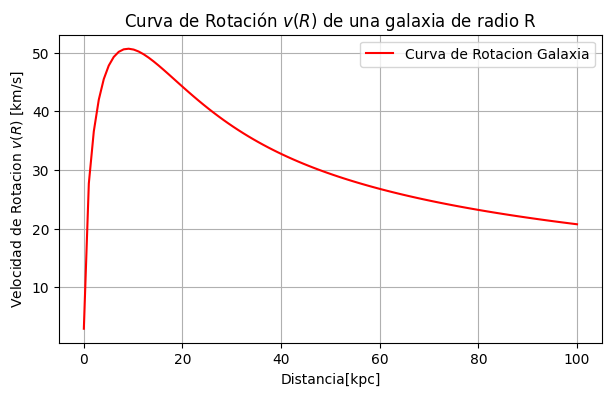

In [3]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (1)

def M_star(R, M_1, R_1):
  return M_1*(1-(np.exp((-R/R_1))*(R+R_1)/R_1))

# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M1, R1):
  return np.sqrt((G*M_star(R,M1,R1))/R)/1000

# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01,100,100)*kpc_to_m

# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
M_sun = ctes.M_sun.value #está es kg
M1 = (10**10)*M_sun
R1 = 5*kpc_to_m
Mstar = M_star(R,M1,R1)
v_r_stars = v_R_stars(R,M1,R1)

# Haga el gráfico :)
plt.figure(figsize=(7, 4))
plt.plot(R/kpc_to_m,v_r_stars, label = 'Curva de Rotacion Galaxia', c = 'red')
plt.title('Curva de Rotación $v(R)$ de una galaxia de radio R')
plt.xlabel('Distancia[kpc]')
plt.ylabel('Velocidad de Rotacion $v(R)$ [km/s]')
plt.legend()
plt.grid(True)
plt.show()

#realizamos el grafico:


# No olvide en cada eje indicar las unidades.


3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Se puede observar que la velocidad de rotacion es pequeña (cerca de 5 km/s).


 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


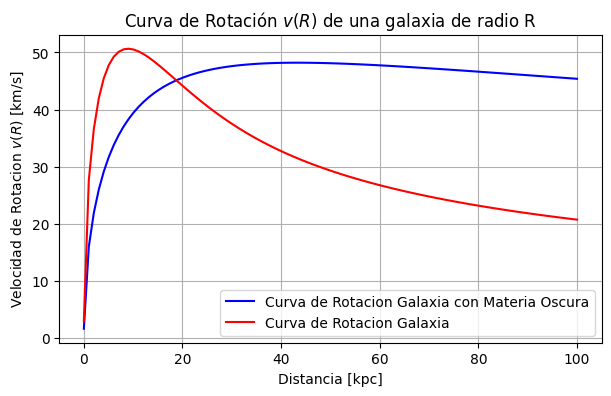

In [4]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
def M_dm(R, M0, R0):
  return M0*(np.log((R0+R)/R0)+ R0/(R0+R)-1)

# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
#definimos las variables a usar:


def v_R_dm(R, M0, R0):
  return (np.sqrt((G*M_dm(R,M0,R0))/R))/1000

# Utilice el mismo arreglo R de la parte anterior.
# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

# Como vamos a utilizar el mismo arreglo R no hay necesidad de realizar uno nuevo.

#definimos las variables a utilizar:

M0 = 5*(10**10)*M_sun #donde M_sun lo habiamos definido antes como las masa del sol en kg
R0 = 20*kpc_to_m
v_r_dm = v_R_dm(R,M0,R0)
v_r_stars = v_R_stars(R,M1,R1)
# Gráfico:
plt.figure(figsize=(7, 4))
plt.plot(R/kpc_to_m,v_r_dm, label = 'Curva de Rotacion Galaxia con Materia Oscura', c = 'blue')
plt.plot(R/kpc_to_m,v_r_stars, label = 'Curva de Rotacion Galaxia', c = 'red')
plt.title('Curva de Rotación $v(R)$ de una galaxia de radio R')
plt.xlabel('Distancia [kpc]')
plt.ylabel('Velocidad de Rotacion $v(R)$ [km/s]')
plt.legend()
plt.grid(True)
plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** Al parecer en distancias cortas es el componente de la estrella y a distancais largas la materia oscura

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [5]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/Tarea Modulos/Modulo Tarea 3/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

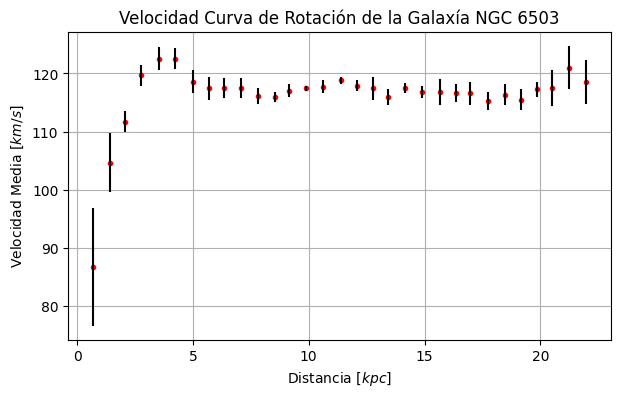

In [8]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.e

distancia = datos [:,0] #extraemos la primera columna
v_media = datos [:,1] #extraemos la segunda columna
errores = datos [:,2] #extraemos la tercera columna
plt.figure(figsize=(7, 4))
plt.title('Velocidad Curva de Rotación de la Galaxía NGC 6503')
plt.plot(distancia,v_media, linestyle="", marker='.', c = 'red')
plt.errorbar(distancia,v_media,errores,linestyle = '',marker='',c = 'black')
plt.xlabel('Distancia [$kpc$]')
plt.ylabel('Velocidad Media [$km/s$]')
plt.grid(True)

Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** Es un ajuste de un modelo no lineal, pues las formulas anteriores no son directamente una ecuacion del estilo ax+ b = f(x)

In [9]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [10]:
# Escriba la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).
# Hint: puede directamente construir esta ecuación con v_R_dm y v_R_stars, le puede ahorrar errores.

def v_R_tot(R, M0, R0, M1, R1):
  return np.sqrt((v_R_stars(R,M1,R1)**2) + (v_R_dm(R,M0,R0)**2))

# Utilice curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Para las condiciones iniciales, considere masas entre 1e10 a 1e11 masas solares, y radios entre 1 a 20 kpc.
# Rellene según corresponda, ignore las variables "pcov"

p_iniciales = (10**10)*M_sun,7*kpc_to_m

popt_stars, pcov_stars = curve_fit(v_R_stars,distancia*kpc_to_m,v_media, p0= p_iniciales, sigma =errores)

popt_dm, pcov_dm = curve_fit(v_R_dm,distancia*kpc_to_m,v_media, p0= p_iniciales, sigma =errores )

popt_tot, pcov_tot = curve_fit(v_R_tot,distancia*kpc_to_m,v_media, p0= p_iniciales*2, sigma =errores)

<ipython-input-4-b48451fe1c35>:3: RuntimeWarning: invalid value encountered in log
  return M0*(np.log((R0+R)/R0)+ R0/(R0+R)-1)
<ipython-input-4-b48451fe1c35>:10: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt((G*M_dm(R,M0,R0))/R))/1000


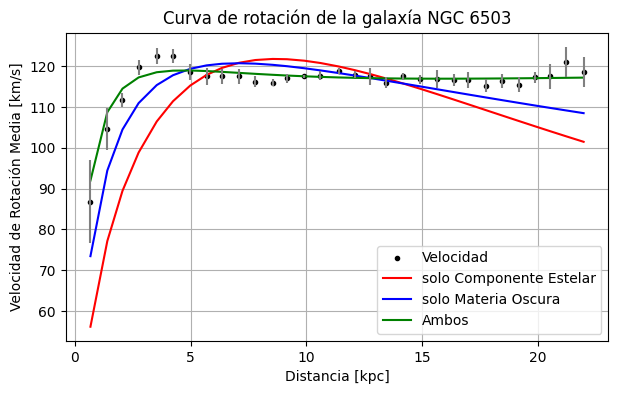

In [11]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.
plt.figure(figsize=(7, 4))
plt.plot(distancia,v_media, linestyle="", marker='.', c = 'black',label = 'Velocidad')
plt.plot(distancia,v_R_stars(distancia*kpc_to_m,*popt_stars), label = 'solo Componente Estelar', c = 'red')
plt.plot(distancia,v_R_dm(distancia*kpc_to_m,*popt_dm), label = 'solo Materia Oscura', c = 'blue')
plt.plot(distancia,v_R_tot(distancia*kpc_to_m,*popt_tot), label = 'Ambos', c = 'green')
plt.errorbar(distancia,v_media,errores,linestyle = '',marker='',c = 'grey')
plt.legend()
plt.xlabel('Distancia [kpc]')
plt.ylabel('Velocidad de Rotación Media [km/s]')
plt.title('Curva de rotación de la galaxía NGC 6503')
plt.grid(True)
plt.show()

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [12]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i
pred_tot = v_R_tot(distancia*kpc_to_m,*popt_tot)
pred_dm = v_R_dm(distancia*kpc_to_m,*popt_dm)
pred_stars = v_R_stars(distancia*kpc_to_m,*popt_stars)
# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred):
  return sum( (datos - pred)**2 / sigma**2 )

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado(v_media, errores,pred_tot))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(v_media, errores,pred_dm))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(v_media, errores,pred_stars))

Chi-cuadrado (dm+stars):  33.19549470031616
Chi-cuadrado (dm-only):  223.74106990265818
Chi-cuadrado (stars-only):  853.3934034007176


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?
2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [13]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

se utiliza para establecer una semilla en el generador de números aleatorios de NumPy, lo que permite obtener los mismos resultados en cada ejecución cuando se generen números aleatorios. Usar la semilla es importante porque nos permite la reproducibilidad de los resultados permitiendo que sean consistentes y verificables.

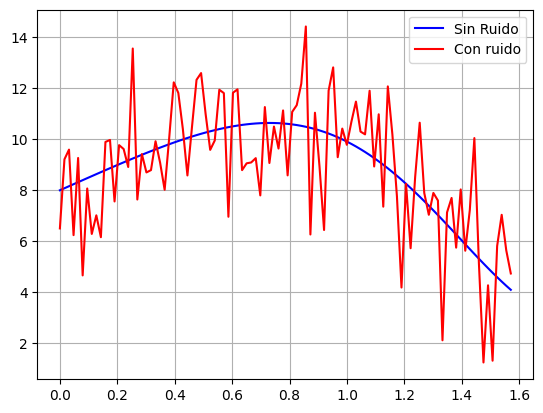

In [34]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
y_real = 5*np.sin(x) + 5*np.cos(x**2) + 3

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

y_ruido = y_real + np.random.normal(0,2,N_data)

# Visualice sus datos :)
# Puede graficar la función sin ruido si así lo desea. (opcional)

plt.plot(x,y_real, c= 'blue', label = 'Sin Ruido') #sin ruido
plt.plot(x,y_ruido, c ='red',label = 'Con ruido')
plt.legend()
plt.grid()
plt.show()

Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [27]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100 # puede cambiar este valor si lo desea
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [39]:
# Reshape necesario para usar en scikit-learn
X = x.reshape(-1, 1)
y = y_ruido
for i in range(N_iteraciones):
    # Divida los datos en entrenamiento y testeo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    for j in range(1, 11):  # Esto va a Iterar desde grado 1 hasta 10
        poly = PolynomialFeatures(degree=j, include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        errores_modelos[j-1, i] = mse


Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

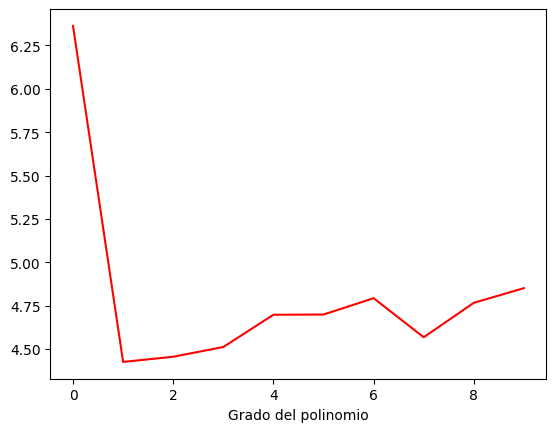

In [44]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?
# el parametro axis = 1 indica que se debe calcular el promedio a lo largo de cada fila, es decir,
#para cada fila de la matriz, se calcula el promedio de todos los elementos en esa fila.

# Añada su gráfico

mean_modelo = np.mean(errores_modelos, axis=1)
plt.plot(mean_modelo,c = 'red')
plt.xlabel('Grado del polinomio')
plt.show()

El grado óptimo del polinomio es el dos pues es aquel que tiene un menor error-